In [1]:
# import related library
from numpy import random
from scipy import optimize

import numpy as np
import matplotlib.pyplot as plt


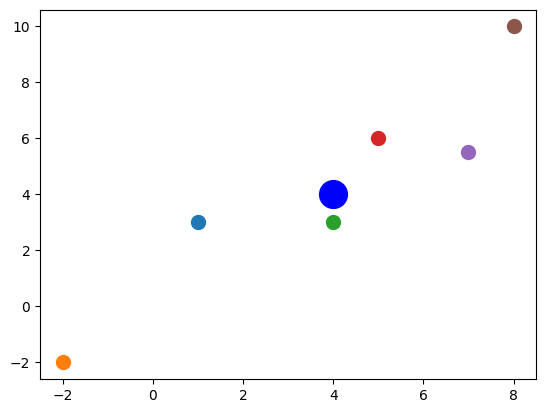

In [28]:
# first define known beacon positions
# each column represents one beacon position, e.g.: ith column b(:,i):
# b(1,i) is the x-coordinate of the ith beacon, while b(2,i) is the y-coordinate of the ith beacon
b = np.mat([[1, -2, 4, 5,   7,  8],
            [3, -2,  3, 6,   5.5, 10 ]])

# for testing purpose, we assume we know  the true location of the robot
# this is \theta to be estimated
truePose = np.transpose(np.mat([4, 0]))

# plot beacon and true target location
for i in range(np.size(b, 1)):
    plt.plot(b[0, i], b[1, i], 'o', ms=10)

plt.plot(truePose[0], truePose[0], 'bo', ms=20)


In [22]:
# let's first define our cost function
def myCost(theta,b,y):
    J = 0
    m = np.size(b,1)
    for i in range(m):
        J  +=np.square(y[i] - np.linalg.norm(theta - b[:,i],axis=0))
    # np.linalg.norm, axis = 0 for column vecotr and axis =1 for row vetor
    return J

In [29]:
#for testing purpose, we generate some measurement data
m = np.size(b,1)
noise = 0.01*random.random(size=(m,1))
y = np.zeros(m)

for i in range(m):
    y[i] = np.linalg.norm(truePose - b[:,i],axis=0) + noise[i]

theta0 =np.mat('2;2') 

In [30]:
# find the optimal solution
thetahat_LS, resnorm = optimize.leastsq(myCost,theta0,args=(b,y))

In [31]:
print(thetahat_LS)

[1.50481678 1.50481678]


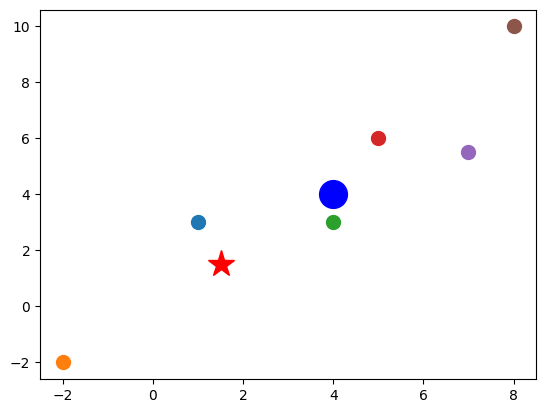

In [32]:
# plot beacon and true target location
for i in range(np.size(b, 1)):
    plt.plot(b[0, i], b[1, i], 'o', ms = 10)

plt.plot(truePose[0],truePose[0],'bo',ms = 20)
# plot estimated location
plt.plot(thetahat_LS[0],thetahat_LS[1],'r*',ms=20)
